In [120]:
import zipfile
import os
import io
import sys
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML
from stargazer.stargazer import Stargazer
import statsmodels.nonparametric.kernel_regression as loess

from mizani.transforms import log_trans
from mizani.formatters import percent_format
from mizani.formatters import log_format

# GET DATA

In [6]:
def txt_to_csv(input_file_name, output_file_name, delimiter='\t', header=True):
    # Get the current working directory
    cwd = os.getcwd()

    # Create full file paths
    input_file_path = os.path.join(cwd, input_file_name)
    output_file_path = os.path.join(cwd, output_file_name)

    # Read the text file
    header_row = 0 if header else None
    df = pd.read_csv(input_file_path, delimiter=delimiter, header=header_row)

    # Save the dataframe to a CSV file
    df.to_csv(output_file_path, index=False)

    # Ensure the CSV file has been created before deleting the TXT file
    #if os.path.exists(output_file_path):
        #os.remove(input_file_path)
    #else:
        #print("Error in converting to CSV, TXT file not deleted.")


In [8]:
def zip_csv(input_csv, output_zip):
    # Read the CSV into a DataFrame
    df = pd.read_csv(input_csv)

    # No need to identify and filter by top species; we skip that step

    # Create a buffer to write the DataFrame to
    buffer = io.StringIO()
    df.to_csv(buffer, index=False)
    buffer.seek(0)  # Rewind the buffer

    # Zip the buffered CSV
    with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
        zipf.writestr(os.path.basename(input_csv), buffer.getvalue())

    # Check if the zip file has been created and is not empty before deleting the original CSV
    #if os.path.exists(output_zip) and os.path.getsize(output_zip) > 0:
        #os.remove(input_csv)
    #else:
        #print("Error in zipping process, original CSV file not deleted.")


In [2]:
def unzip_and_read_csv(input_zip):
    with zipfile.ZipFile(input_zip, 'r') as zipf:
        # Assuming there's only one file in the zip
        csv_file_name = zipf.namelist()[0]
        with zipf.open(csv_file_name) as csv_file:
            return pd.read_csv(csv_file)


In [7]:
txt_to_csv('NORCAR_JAN.txt', 'NORCAR_JAN.csv')
txt_to_csv('NORCAR_APRIL.txt', 'NORCAR_APRIL.csv')
txt_to_csv('NORCAR_JUL.txt', 'NORCAR_JUL.csv')
txt_to_csv('NORCAR_OCT.txt', 'NORCAR_OCT.csv')

C:\Users\iandr\AppData\Local\Temp\ipykernel_28092\1485924221.py:11: DtypeWarning: Columns (7,8,9,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path, delimiter=delimiter, header=header_row)
C:\Users\iandr\AppData\Local\Temp\ipykernel_28092\1485924221.py:11: DtypeWarning: Columns (7,8,9,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path, delimiter=delimiter, header=header_row)
C:\Users\iandr\AppData\Local\Temp\ipykernel_28092\1485924221.py:11: DtypeWarning: Columns (9,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path, delimiter=delimiter, header=header_row)
C:\Users\iandr\AppData\Local\Temp\ipykernel_28092\1485924221.py:11: DtypeWarning: Columns (7,8,9,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path, delimiter=delimiter, header=header_row)


In [9]:
zip_csv('NORCAR_JAN.csv', 'NORCAR_JAN.zip')
zip_csv('NORCAR_APRIL.csv', 'NORCAR_APRIL.zip')
zip_csv('NORCAR_JUL.csv', 'NORCAR_JUL.zip')
zip_csv('NORCAR_OCT.csv', 'NORCAR_OCT.zip')

C:\Users\iandr\AppData\Local\Temp\ipykernel_28092\412126305.py:3: DtypeWarning: Columns (7,8,9,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv)
C:\Users\iandr\AppData\Local\Temp\ipykernel_28092\412126305.py:3: DtypeWarning: Columns (7,8,9,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv)
C:\Users\iandr\AppData\Local\Temp\ipykernel_28092\412126305.py:3: DtypeWarning: Columns (9,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv)
C:\Users\iandr\AppData\Local\Temp\ipykernel_28092\412126305.py:3: DtypeWarning: Columns (7,8,9,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv)


# UNZIP DATA 

In [52]:
NORCAR_JAN = unzip_and_read_csv('NORCAR_JAN.zip')
NORCAR_APRIL = unzip_and_read_csv('NORCAR_APRIL.zip')
NORCAR_JUL = unzip_and_read_csv('NORCAR_JUL.zip')
NORCAR_OCT = unzip_and_read_csv('NORCAR_OCT.zip')

C:\Users\iandr\AppData\Local\Temp\ipykernel_42200\3041235366.py:6: DtypeWarning: Columns (7,8,9,24) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\iandr\AppData\Local\Temp\ipykernel_42200\3041235366.py:6: DtypeWarning: Columns (7,8,9,24) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\iandr\AppData\Local\Temp\ipykernel_42200\3041235366.py:6: DtypeWarning: Columns (9,24) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\iandr\AppData\Local\Temp\ipykernel_42200\3041235366.py:6: DtypeWarning: Columns (7,8,9,24) have mixed types. Specify dtype option on import or set low_memory=False.


In [83]:
NORCAR_DATA = pd.concat([NORCAR_JAN, NORCAR_APRIL, NORCAR_JUL, NORCAR_OCT], ignore_index=True)

In [84]:
NORCAR_DATA

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
0,URN:CornellLabOfOrnithology:EBIRD:OBS1321062323,2022-01-17 18:40:50.322886,33967,species,avibase-4E74AE22,Northern Cardinal,Cardinalis cardinalis,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS1329949757,2022-01-29 19:01:35.293943,33967,species,avibase-4E74AE22,Northern Cardinal,Cardinalis cardinalis,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS1310720761,2022-01-05 10:13:44.923674,33967,species,avibase-4E74AE22,Northern Cardinal,Cardinalis cardinalis,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS1330369258,2022-02-03 20:50:42.362749,33967,species,avibase-4E74AE22,Northern Cardinal,Cardinalis cardinalis,NaN,NaN,NaN,...,2.0,1.0,G7820255,0.0,1.0,0.0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS1307344186,2022-01-01 07:45:21.316389,33967,species,avibase-4E74AE22,Northern Cardinal,Cardinalis cardinalis,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982662,URN:CornellLabOfOrnithology:EBIRD:OBS1535493362,2022-10-08 17:57:29.361748,33967,species,avibase-4E74AE22,Northern Cardinal,Cardinalis cardinalis,NaN,NaN,NaN,...,25.0,1.0,G9010626,0.0,1.0,0.0,NaN,NaN,NaN,NaN
982663,URN:CornellLabOfOrnithology:EBIRD:OBS1539042891,2022-10-12 19:22:12.229408,33967,species,avibase-4E74AE22,Northern Cardinal,Cardinalis cardinalis,NaN,NaN,NaN,...,2.0,1.0,G9036301,0.0,1.0,0.0,NaN,NaN,NaN,NaN
982664,URN:CornellLabOfOrnithology:EBIRD:OBS1533970210,2022-10-09 09:36:37.239184,33967,species,avibase-4E74AE22,Northern Cardinal,Cardinalis cardinalis,NaN,NaN,NaN,...,1.0,1.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN
982665,URN:CornellLabOfOrnithology:EBIRD:OBS1541452791,2022-10-17 22:19:01.945751,33967,species,avibase-4E74AE22,Northern Cardinal,Cardinalis cardinalis,NaN,NaN,NaN,...,3.0,1.0,G9050645,0.0,1.0,0.0,NaN,NaN,NaN,NaN


# PROCESS AND CLEAN DATA

## BIRD DATA CLEANER

In [78]:
def ebird_data_processor(data):
    """
    Example usage: 
    ebird_data_processor(OK_Data)
    
    This function cleans ebird data. The following list shows what this function executes within the dataframe: 
    - Converts the observation counts to numeric data, and explaces 'X' with '0'
    - Replaces spaces with '_'
    - Creates a month column that names the months by their English names
    - Drops unnecessary columns
    """
    
    data.columns = data.columns.str.replace(' ', '_')
    data['OBSERVATION_COUNT'] = pd.to_numeric(data['OBSERVATION_COUNT'].str.replace('X', '0').str.strip())
    data['OBSERVATION_DATE'] = pd.to_datetime(data['OBSERVATION_DATE'])
    data['MONTH'] = data['OBSERVATION_DATE'].dt.strftime('%B')
    

    # Columns to drop
    columns_to_drop = ['LAST_EDITED_DATE', 'TAXONOMIC_ORDER', 'CATEGORY', 'TAXON_CONCEPT_ID',
                       'SUBSPECIES_COMMON_NAME', 'SUBSPECIES_SCIENTIFIC_NAME', 'EXOTIC_CODE',
                       'BREEDING_CODE', 'BREEDING_CATEGORY', 'BEHAVIOR_CODE', 'AGE/SEX', 'COUNTRY', 
                       'COUNTRY_CODE', 'COUNTY_CODE', 'IBA_CODE', 'BCR_CODE',
                       'ATLAS_BLOCK', 'LOCALITY', 'LOCALITY_ID', 'USFWS_CODE', 'LOCALITY_TYPE',
                       'SAMPLING_EVENT_IDENTIFIER', 'PROTOCOL_TYPE', 'PROTOCOL_CODE', 'PROJECT_CODE',
                       'EFFORT_AREA_HA', 'ALL_SPECIES_REPORTED', 'GROUP_IDENTIFIER', 'HAS_MEDIA', 
                       'APPROVED', 'REVIEWED', 'REASON', 'TRIP_COMMENTS', 'SPECIES_COMMENTS', 
                       'Unnamed:_49']

    data = data.drop(columns=columns_to_drop, errors='ignore')
    
    #aggregate by state and county
    county_aggregate = data.groupby(['STATE', 'COUNTY']).agg({
    'OBSERVATION_COUNT': 'sum',  # Sum of observation counts
    'DURATION_MINUTES': 'mean',  # Average duration in minutes
    'EFFORT_DISTANCE_KM': 'mean' # Average effort distance in km
    })
    
    #reset index
    county_aggregate = county_aggregate.reset_index()
    
    # renaming the columns to match the name of the county dataset
    county_aggregate = county_aggregate.rename(columns={'STATE': 'State', 'COUNTY': 'Area_Name'})
    
    
    # filter for counties with higher than a 10 observation count
    county_aggregate = county_aggregate[county_aggregate['OBSERVATION_COUNT'] >= 10]
    
    # filter out states that northern cardinals are known to not frequent
    states_to_drop = ['Washington', 'Oregon', 'Idaho', 'Montana', 'Utah', 
                  'California', 'Wyoming', 'Hawaii', 'Alaska']
    county_aggregate = county_aggregate.drop(county_aggregate[county_aggregate['State'].isin(states_to_drop)].index)
    
    # filter out the top and bottom 1%
    df_sorted = county_aggregate.sort_values(by='OBSERVATION_COUNT')
    one_percent_count = int(len(merged_data) * 0.01)
    bottom_1_percent_indices = df_sorted.head(one_percent_count).index
    top_1_percent_indices = df_sorted.tail(one_percent_count).index
    
    df_cleaned = county_aggregate.drop(bottom_1_percent_indices).drop(top_1_percent_indices)

    return df_cleaned


In [85]:
NORCAR_DATA_PROCESSED = ebird_data_processor(NORCAR_DATA)

## COUNTY DATA CLEANER

In [91]:
Population_Estimates = pd.read_csv('PopulationEstimates.csv')
Population_Estimates

,FIPStxt,State_Code,State,Area_Name,Rural_Urban_Continuum_Code_2003,Rural_Urban_Continuum_Code_2013,Urban_Influence_2003,Urban_Influence_2013,Economic_typology_2015,CENSUS_2020_POP,...,R_DEATH_2021,R_DEATH_2022,R_NATURAL_CHG_2021,R_NATURAL_CHG_2022,R_INTERNATIONAL_MIG_2021,R_INTERNATIONAL_MIG_2022,R_DOMESTIC_MIG_2021,R_DOMESTIC_MIG_2022,R_NET_MIG_2021,R_NET_MIG_2022
0,1001,AL,Alabama,Autauga County,2.0,2.0,2.0,2.0,0.0,"58,805",...,11.5,11.3,0.2,0.6,0.3,0.5,4.1,8.5,4.3,9.0
1,1003,AL,Alabama,Baldwin County,4.0,3.0,5.0,2.0,5.0,"231,767",...,12.9,12.0,-2.9,-2.1,0.4,1.3,29.5,28.7,29.9,30.0
2,1005,AL,Alabama,Barbour County,6.0,6.0,6.0,6.0,3.0,"25,223",...,15.5,15.1,-4.3,-3.9,0.0,0.2,-12.4,9.9,-12.4,10.0
3,1007,AL,Alabama,Bibb County,1.0,1.0,1.0,1.0,0.0,"22,293",...,14.3,14.5,-3.3,-3.3,0.0,0.1,11.6,-13.6,11.7,-13.5
4,1009,AL,Alabama,Blount County,1.0,1.0,1.0,1.0,0.0,"59,134",...,14.6,14.2,-3.5,-2.9,0.2,0.2,2.4,10.0,2.5,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Wyoming,Sweetwater County,5.0,5.0,8.0,8.0,2.0,"42,272",...,10.1,10.5,0.7,0.4,0.4,1.2,-15.3,-7.2,-14.9,-6.0
3139,56039,WY,Wyoming,Teton County,7.0,7.0,8.0,8.0,5.0,"23,331",...,4.0,4.5,5.4,4.7,0.3,1.1,4.6,-20.3,4.8,-19.2
3140,56041,WY,Wyoming,Uinta County,7.0,7.0,8.0,8.0,2.0,"20,450",...,9.0,9.6,2.0,1.3,0.0,-0.2,7.2,2.0,7.2,1.8
3141,56043,WY,Wyoming,Washakie County,7.0,7.0,11.0,11.0,0.0,"7,685",...,14.3,14.9,-4.8,-5.2,0.0,-0.1,12.0,6.7,12.0,6.6


In [92]:
def County_Data_Processor(df):
    
    df['Area_Name'] = df['Area_Name'].str.replace(' County', '', regex=False)
    

    columns_to_drop = [
        'POP_ESTIMATE_2020', 'POP_ESTIMATE_2021',
        'N_POP_CHG_2020', 'N_POP_CHG_2021', 'N_POP_CHG_2022',
        'BIRTHS_2020', 'BIRTHS_2021', 'BIRTHS_2022',
        'DEATHS_2020', 'DEATHS_2021', 'DEATHS_2022',
        'NATURAL_CHG_2020', 'NATURAL_CHG_2021',
        'INTERNATIONAL_MIG_2020', 'INTERNATIONAL_MIG_2021', 'INTERNATIONAL_MIG_2022',
        'DOMESTIC_MIG_2020', 'DOMESTIC_MIG_2021', 'DOMESTIC_MIG_2022',
        'NET_MIG_2020', 'NET_MIG_2021',
        'RESIDUAL_2020', 'RESIDUAL_2021', 'RESIDUAL_2022',
        'GQ_ESTIMATES_BASE_2020', 'GQ_ESTIMATES_2020', 'GQ_ESTIMATES_2021', 'GQ_ESTIMATES_2022',
        'R_BIRTH_2021', 'R_BIRTH_2022', 'R_DEATH_2021', 'R_DEATH_2022',
        'R_NATURAL_CHG_2021',
        'R_INTERNATIONAL_MIG_2021', 'R_INTERNATIONAL_MIG_2022',
        'R_DOMESTIC_MIG_2021', 'R_DOMESTIC_MIG_2022',
        'R_NET_MIG_2021', 'Rural_Urban_Continuum_Code_2003', 'Urban_Influence_2003',
        'ESTIMATES_BASE_2020'
    ]

    df = df.drop(columns=columns_to_drop)
    
    
    return df
    

In [93]:
County_Data_Processed = County_Data_Processor(Population_Estimates)
County_Data_Processed

,FIPStxt,State_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_2013,Economic_typology_2015,CENSUS_2020_POP,POP_ESTIMATE_2022,NATURAL_CHG_2022,NET_MIG_2022,R_NATURAL_CHG_2022,R_NET_MIG_2022
0,1001,AL,Alabama,Autauga,2.0,2.0,0.0,"58,805","59,759",36,535,0.6,9.0
1,1003,AL,Alabama,Baldwin,3.0,2.0,5.0,"231,767","246,435",-498,"7,297",-2.1,30.0
2,1005,AL,Alabama,Barbour,6.0,6.0,3.0,"25,223","24,706",-95,247,-3.9,10.0
3,1007,AL,Alabama,Bibb,1.0,1.0,0.0,"22,293","22,005",-73,-299,-3.3,-13.5
4,1009,AL,Alabama,Blount,1.0,1.0,0.0,"59,134","59,512",-170,606,-2.9,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Wyoming,Sweetwater,5.0,8.0,2.0,"42,272","41,345",17,-249,0.4,-6.0
3139,56039,WY,Wyoming,Teton,7.0,8.0,5.0,"23,331","23,287",111,-451,4.7,-19.2
3140,56041,WY,Wyoming,Uinta,7.0,8.0,2.0,"20,450","20,712",27,38,1.3,1.8
3141,56043,WY,Wyoming,Washakie,7.0,11.0,0.0,"7,685","7,719",-40,51,-5.2,6.6


## MERGE DATA

In [94]:
def df_merger(df1, df2):
    
    merged_data = pd.merge(df1, df2, on=['State', 'Area_Name'], how='inner')
    
    return merged_data

In [95]:
county_norcar_merged = df_merger(County_Data_Processed, NORCAR_DATA_PROCESSED)
county_norcar_merged

,FIPStxt,State_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_2013,Economic_typology_2015,CENSUS_2020_POP,POP_ESTIMATE_2022,NATURAL_CHG_2022,NET_MIG_2022,R_NATURAL_CHG_2022,R_NET_MIG_2022,OBSERVATION_COUNT,DURATION_MINUTES,EFFORT_DISTANCE_KM
0,1001,AL,Alabama,Autauga,2.0,2.0,0.0,"58,805","59,759",36,535,0.6,9.0,257,44.084906,3.451288
1,1003,AL,Alabama,Baldwin,3.0,2.0,5.0,"231,767","246,435",-498,"7,297",-2.1,30.0,11045,81.141732,3.018089
2,1005,AL,Alabama,Barbour,6.0,6.0,3.0,"25,223","24,706",-95,247,-3.9,10.0,524,107.030000,5.437315
3,1007,AL,Alabama,Bibb,1.0,1.0,0.0,"22,293","22,005",-73,-299,-3.3,-13.5,79,94.555556,3.155542
4,1009,AL,Alabama,Blount,1.0,1.0,0.0,"59,134","59,512",-170,606,-2.9,10.2,68,76.000000,8.819000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,55133,WI,Wisconsin,Waukesha,1.0,1.0,0.0,"406,978","410,434",-496,"2,112",-1.2,5.2,4515,62.212963,2.789457
2184,55135,WI,Wisconsin,Waupaca,6.0,6.0,3.0,"51,812","51,488",-346,-137,-6.7,-2.6,332,59.464968,2.998825
2185,55137,WI,Wisconsin,Waushara,6.0,6.0,5.0,"24,520","24,999",-137,330,-5.5,13.3,208,56.226190,1.531000
2186,55139,WI,Wisconsin,Winnebago,3.0,2.0,3.0,"171,730","170,718",-81,331,-0.5,1.9,2299,59.635112,2.185638


# PREP FOR ANALYSIS

### Urban Development Indicator Variable Descriptions

`FIPStxt` - State + County Federal Information Processing Standard (FIPS) Code

`State_Code` - State Abbreviation

`Area_Name` - County name

`Rural_Urban_Continuum_Code_2013` - Estimating the populations of the country on an ordinal scale

`Urban_Influence_2013` - Estimating the influence of urbanisation on an ordinal scale

`Economic_typology_2015` - County economic types, 2015. Non.overlapping economic-dependence county indicator. 0 = nonspecialized, 1 = farm dependent, 2 = mining dependent, 3 = manufacturing dependent, 4 = federal/state government dependent, 5 = recreation dependent

`Census_2020_POP` - April 1, 2020 resident census population

`POP_ESTIMATE_2022` - July 1, 2022 resident total population estimate

`NATURAL_CHG_2022` - Natural change in period July 1 2021 - June 30, 2022

`NET_MIG_2022` - Net migration in period July 1 2021- June 30, 2022

`R_NATURAL_CHG_2022` - Natural increase rate in period July 1 2021 - June 30, 2022

`R_NET_MIG_2022` - Net migration rate in period July 1 2021 - June 30, 2022


### 2013 Urban Influence Codes

***Metropolitan counties***

- **Code 1**: In large metro area of 1+ million residents
- **Code 2**: In small metro area of less than 1 million residents

***Nonmetropolitan counties***

- **Code 3**: Micropolitan area adjacent to large metro area
- **Code 4**: Noncore adjacent to large metro area
- **Code 5**: Micropolitan area adjacent to small metro area
- **Code 6**: Noncore adjacent to small metro area and contains a town of at least 2,500 residents
- **Code 7**: Noncore adjacent to small metro area and does not contain a town of at least 2,500 residents
- **Code 8**: Micropolitan area not adjacent to a metro area
- **Code 9**: Noncore adjacent to micro area and contains a town of at least 2,500 residents
- **Code 10**: Noncore adjacent to micro area and does not contain a town of at least 2,500 residents
- **Code 11**: Noncore not adjacent to metro or micro area and contains a town of at least 2,500 residents
- **Code 12**: Noncore not adjacent to metro or micro area and does not contain a town of at least 2,500 residents


### 2013 Rural-Urban Continuum Codes

***Metro counties:***

- **Code 1**: Counties in metro areas of 1 million population or more
- **Code 2**: Counties in metro areas of 250,000 to 1 million population
- **Code 3**: Counties in metro areas of fewer than 250,000 population

***Nonmetro counties:***

- **Code 4**: Urban population of 20,000 or more, adjacent to a metro area
- **Code 5**: Urban population of 20,000 or more, not adjacent to a metro area
- **Code 6**: Urban population of 2,500 to 19,999, adjacent to a metro area
- **Code 7**: Urban population of 2,500 to 19,999, not adjacent to a metro area
- **Code 8**: Completely rural or less than 2,500 urban population, adjacent to a metro area
- **Code 9**: Completely rural or less than 2,500 urban population, not adjacent to a metro area


In [202]:
def df_create_dummies(df):
    
    df = county_norcar_merged

    #creating dummies for urban influence and coniuum code columns
    urban_dummies = pd.get_dummies(county_norcar_merged['Urban_Influence_2013'], prefix='UrbanInfluence').astype(int)
    continuum_dummies = pd.get_dummies(county_norcar_merged['Rural_Urban_Continuum_Code_2013'], prefix='Continuum').astype(int)
    economic_dummies = pd.get_dummies(county_norcar_merged['Economic_typology_2015']).rename(columns={
        0: 'EconType_Nonspecialized',
        1: 'EconType_FarmDependent',
        2: 'EconType_MiningDependent',
        3: 'EconType_ManufacturingDependent',
        4: 'EconType_FederalStateGovDependent',
        5: 'EconType_RecreationDependent'
    }).astype(int)
    
    urban_dummies.columns = urban_dummies.columns.str.replace('.0', '', regex=False)
    continuum_dummies.columns = continuum_dummies.columns.str.replace('.0', '', regex=False)

    # joinings the dummies back to the original DataFrame
    county_norcar_merged_dummies = county_norcar_merged.join([urban_dummies, continuum_dummies, economic_dummies])

    return county_norcar_merged_dummies

In [203]:
county_norcar_merged_dummies = df_create_dummies(county_norcar_merged)

In [174]:
county_norcar_merged_dummies['OBSERVATION_COUNT'].describe()

count     2188.000000
mean      1201.957495
std       2377.157683
min         11.000000
25%         79.000000
50%        284.000000
75%       1081.250000
max      17238.000000
Name: OBSERVATION_COUNT, dtype: float64

In [210]:
county_norcar_merged_dummies["ln_OBSERVATION_COUNT"] = np.log(county_norcar_merged_dummies["OBSERVATION_COUNT"])

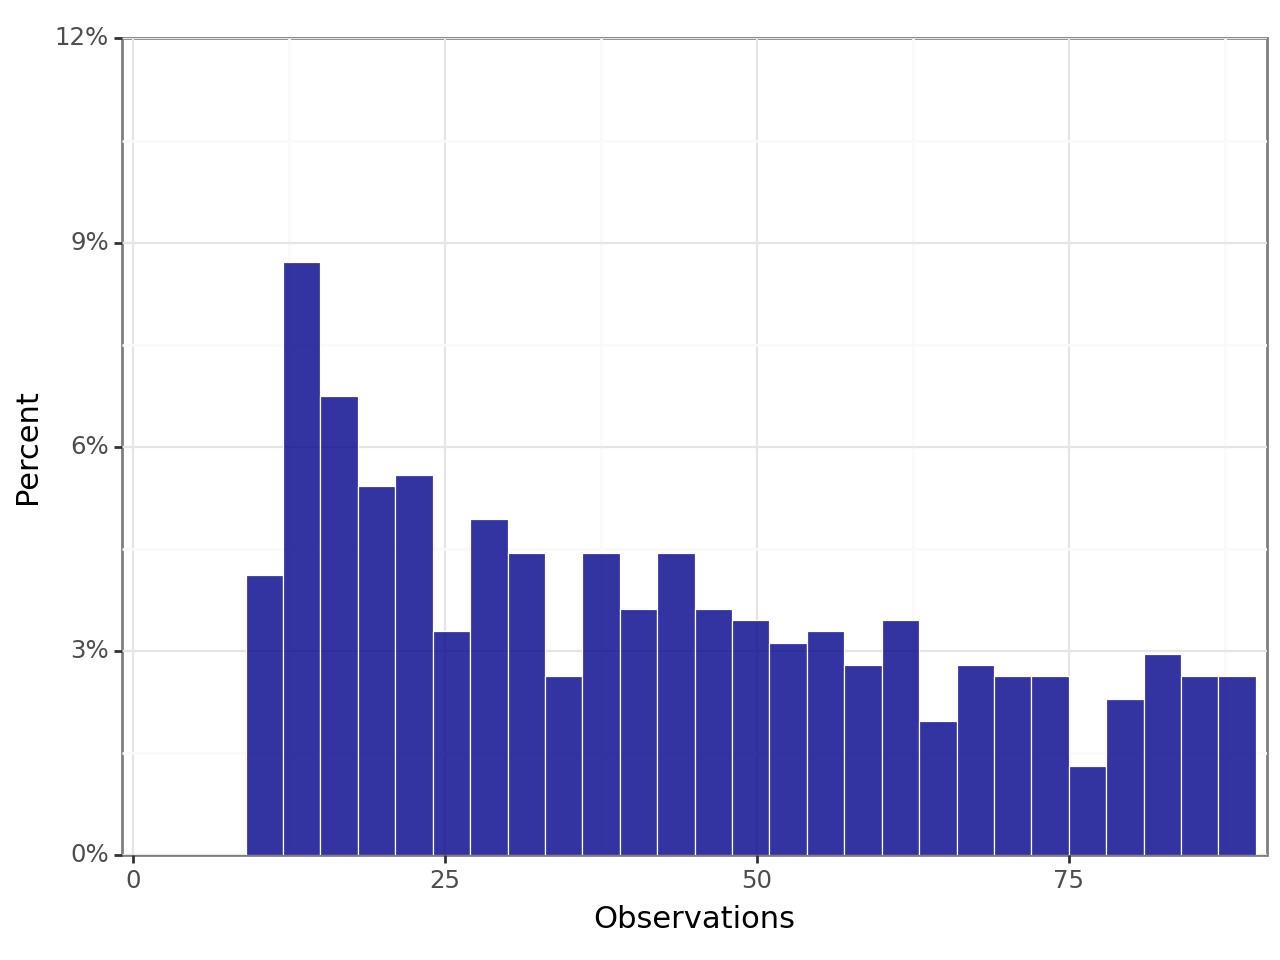

<Figure Size: (640 x 480)>

In [212]:
(
    ggplot(county_norcar_merged_dummies, aes(x="OBSERVATION_COUNT", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=3,
        boundary=0,
        color="white",
        fill = "darkblue",
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Observations", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 90))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)


In [176]:
county_norcar_merged_dummies.columns

Index(['FIPStxt', 'State_Code', 'State', 'Area_Name',
       'Rural_Urban_Continuum_Code_2013', 'Urban_Influence_2013',
       'Economic_typology_2015', 'CENSUS_2020_POP', 'POP_ESTIMATE_2022',
       'NATURAL_CHG_2022', 'NET_MIG_2022', 'R_NATURAL_CHG_2022',
       'R_NET_MIG_2022', 'OBSERVATION_COUNT', 'DURATION_MINUTES',
       'EFFORT_DISTANCE_KM', 'UrbanInfluence_1', 'UrbanInfluence_2',
       'UrbanInfluence_3', 'UrbanInfluence_4', 'UrbanInfluence_5',
       'UrbanInfluence_6', 'UrbanInfluence_7', 'UrbanInfluence_8',
       'UrbanInfluence_9', 'UrbanInfluence_10', 'UrbanInfluence_11',
       'UrbanInfluence_12', 'Continuum_1', 'Continuum_2', 'Continuum_3',
       'Continuum_4', 'Continuum_5', 'Continuum_6', 'Continuum_7',
       'Continuum_8', 'Continuum_9', 'EconType_Nonspecialized',
       'EconType_FarmDependent', 'EconType_MiningDependent',
       'EconType_ManufacturingDependent', 'EconType_FederalStateGovDependent',
       'EconType_RecreationDependent'],
      dtype='object'

In [232]:
# OLS on Urban Influence Codes
reg1 = smf.ols(formula="OBSERVATION_COUNT ~ UrbanInfluence_2", data=county_norcar_merged_dummies).fit(cov_type="HC1") #unconditional
reg2 = smf.ols(formula="OBSERVATION_COUNT ~ UrbanInfluence_2 + UrbanInfluence_3", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg3 = smf.ols(formula="OBSERVATION_COUNT ~ UrbanInfluence_2 + UrbanInfluence_3 + UrbanInfluence_4", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg4 = smf.ols(formula="OBSERVATION_COUNT ~ UrbanInfluence_2 + UrbanInfluence_3 + UrbanInfluence_4 + UrbanInfluence_5", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg5 = smf.ols(formula="OBSERVATION_COUNT ~ UrbanInfluence_2 + UrbanInfluence_3 + UrbanInfluence_4 + UrbanInfluence_5 + UrbanInfluence_6", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg6 = smf.ols(formula="OBSERVATION_COUNT ~ UrbanInfluence_2 + UrbanInfluence_3 + UrbanInfluence_4 + UrbanInfluence_5 + UrbanInfluence_6 + UrbanInfluence_7", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg7 = smf.ols(formula="OBSERVATION_COUNT ~ UrbanInfluence_2 + UrbanInfluence_3 + UrbanInfluence_4 + UrbanInfluence_5 + UrbanInfluence_6 + UrbanInfluence_7 + UrbanInfluence_8", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg8 = smf.ols(formula="OBSERVATION_COUNT ~ UrbanInfluence_2 + UrbanInfluence_3 + UrbanInfluence_4 + UrbanInfluence_5 + UrbanInfluence_6 + UrbanInfluence_7 + UrbanInfluence_8 + UrbanInfluence_9", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg9 = smf.ols(formula="OBSERVATION_COUNT ~ UrbanInfluence_2 + UrbanInfluence_3 + UrbanInfluence_4 + UrbanInfluence_5 + UrbanInfluence_6 + UrbanInfluence_7 + UrbanInfluence_8 + UrbanInfluence_9 + UrbanInfluence_10", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg10 = smf.ols(formula="OBSERVATION_COUNT ~ UrbanInfluence_2 + UrbanInfluence_3 + UrbanInfluence_4 + UrbanInfluence_5 + UrbanInfluence_6 + UrbanInfluence_7 + UrbanInfluence_8 + UrbanInfluence_9 + UrbanInfluence_10 + UrbanInfluence_11", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg11a = smf.ols(formula="OBSERVATION_COUNT ~ UrbanInfluence_2 + UrbanInfluence_3 + UrbanInfluence_4 + UrbanInfluence_5 + UrbanInfluence_6 + UrbanInfluence_7 + UrbanInfluence_8 + UrbanInfluence_9 + UrbanInfluence_10 + UrbanInfluence_11 + UrbanInfluence_12", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg11b = smf.ols(formula="ln_OBSERVATION_COUNT ~ UrbanInfluence_2 + UrbanInfluence_3 + UrbanInfluence_4 + UrbanInfluence_5 + UrbanInfluence_6 + UrbanInfluence_7 + UrbanInfluence_8 + UrbanInfluence_9 + UrbanInfluence_10 + UrbanInfluence_11 + UrbanInfluence_12", data=county_norcar_merged_dummies).fit(cov_type="HC1")


stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8, reg9, reg10, reg11a, reg11b])
stargazer.covariate_order(["UrbanInfluence_2", "UrbanInfluence_3", "UrbanInfluence_4", 
                           "UrbanInfluence_5", "UrbanInfluence_6", "UrbanInfluence_7", 
                           "UrbanInfluence_8", "UrbanInfluence_9", "UrbanInfluence_10",
                           "UrbanInfluence_11", "UrbanInfluence_12", "Intercept"])

stargazer.rename_covariates({
    "UrbanInfluence_2": "Urban Influence Code 2",
    "UrbanInfluence_3": "Urban Influence Code 3",
    "UrbanInfluence_4": "Urban Influence Code 4",
    "UrbanInfluence_5": "Urban Influence Code 5",
    "UrbanInfluence_6": "Urban Influence Code 6",
    "UrbanInfluence_7": "Urban Influence Code 7",
    "UrbanInfluence_8": "Urban Influence Code 8",
    "UrbanInfluence_9": "Urban Influence Code 9",
    "UrbanInfluence_10": "Urban Influence Code 10",
    "UrbanInfluence_11": "Urban Influence Code 11",
    "UrbanInfluence_12": "Urban Influence Code 12",
    "Intercept": "Constant"
})
#stargazer.custom_columns(["Unconditional", "Level of Education", "BA Degree Quadratic", "MA & Prof Degree", "4th Order Polynomial"], [1, 1, 1, 1, 1])
stargazer

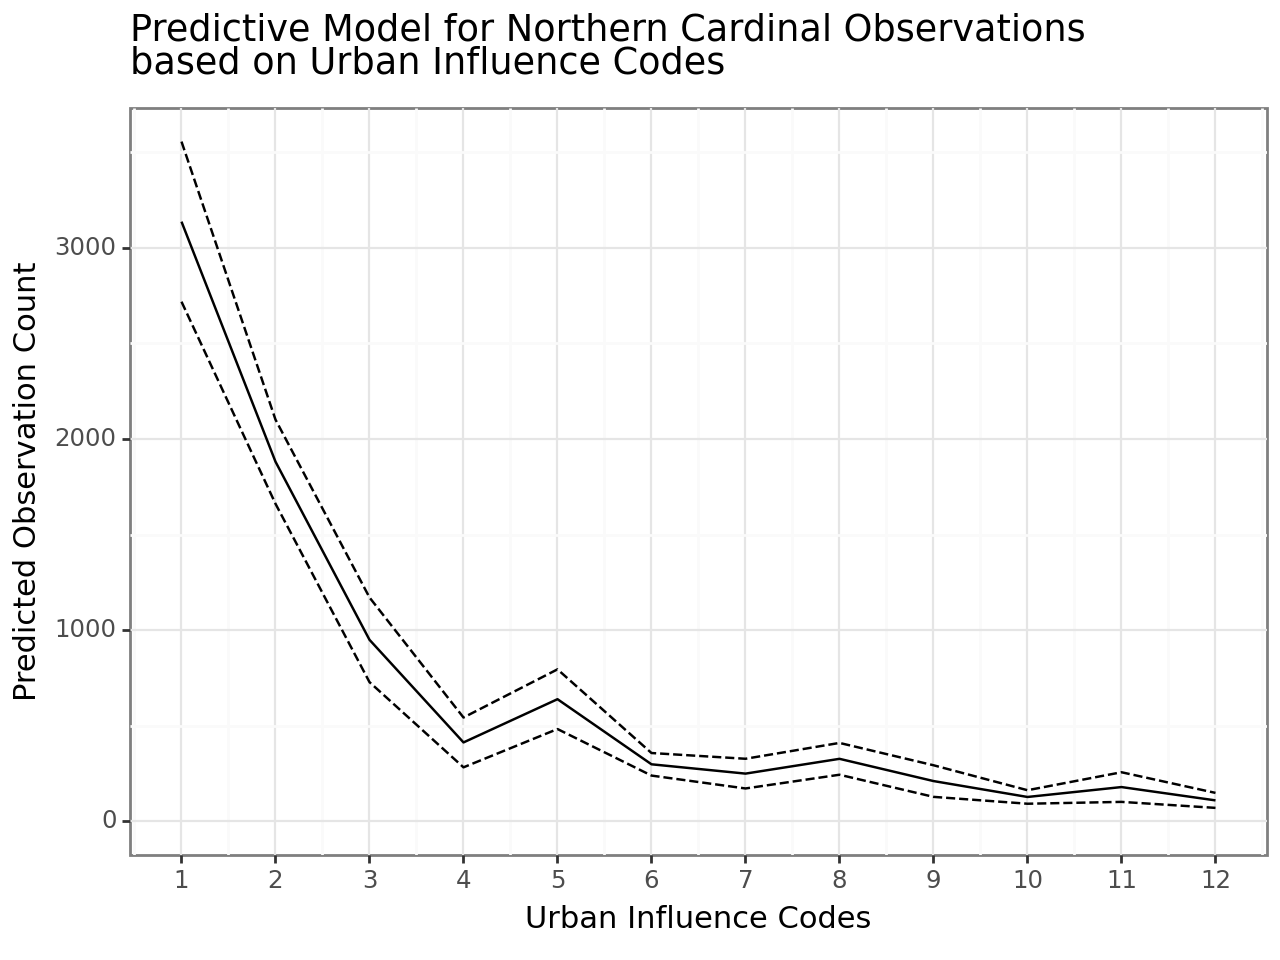

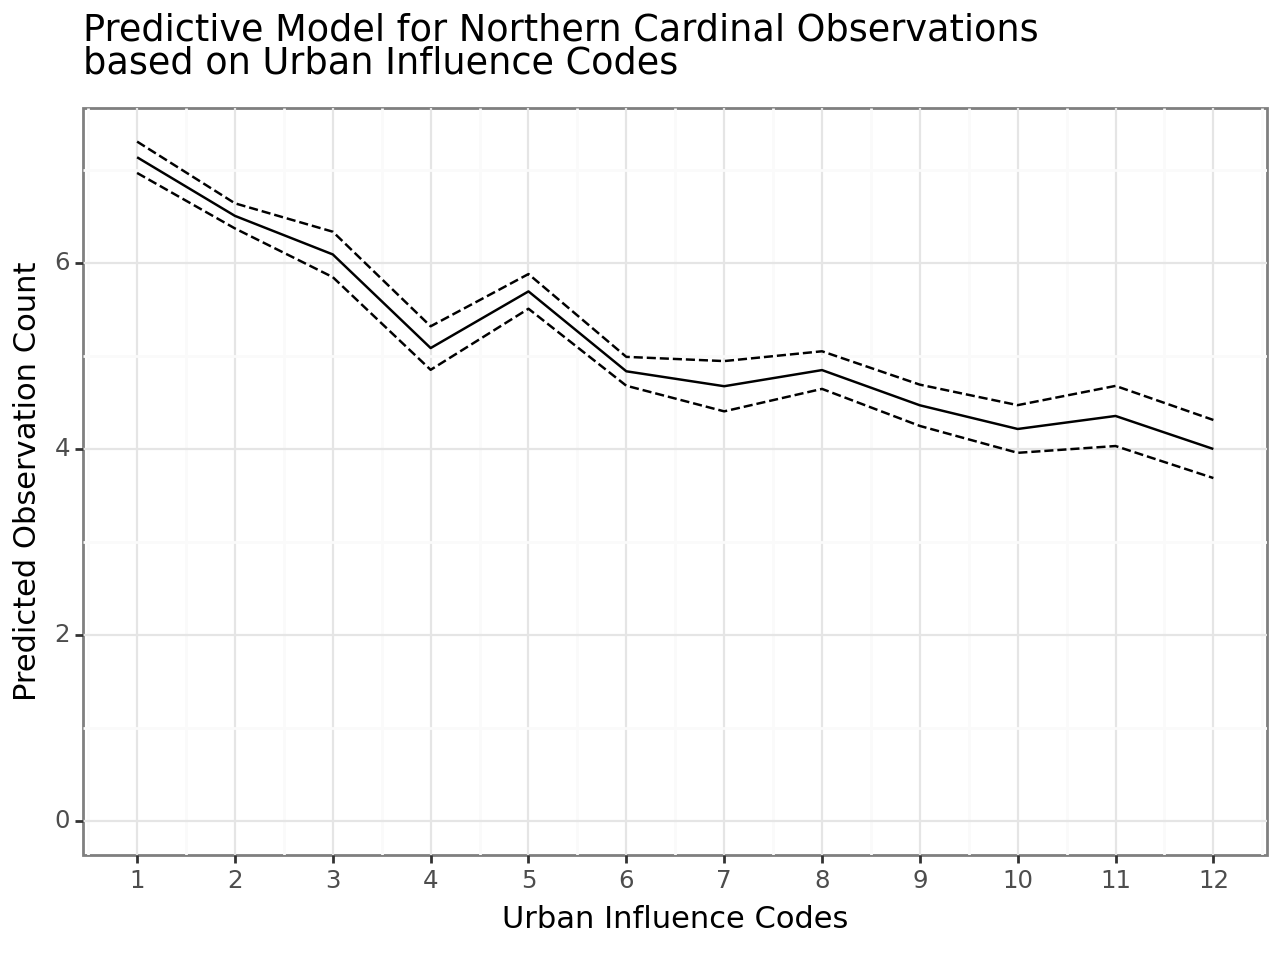

In [233]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_line, labs, theme_bw, scale_y_continuous

# Use the regression model to predict 'OBSERVATION_COUNT' based on the dataset
pred = reg11a.get_prediction(county_norcar_merged_dummies).summary_frame()
county_norcar_merged_dummies = county_norcar_merged_dummies.assign(
    fit=pred["mean"],
    fit_se=pred["mean_se"],
    CIup=pred["mean_ci_upper"],
    CIlo=pred["mean_ci_lower"]
)

# Plotting the predictions along with their confidence intervals
plot = (
    ggplot(county_norcar_merged_dummies, aes(x="Urban_Influence_2013", y="fit")) +  # Assuming 'UrbanInfluence_2' is the x-axis variable
    geom_line() +  # Plot the line for fit values
    geom_line(aes(y="CIup"), linetype="dashed") +  # Plot the upper CI
    geom_line(aes(y="CIlo"), linetype="dashed") +  # Plot the lower CI
    labs(title="Predictive Model for Northern Cardinal Observations\nbased on Urban Influence Codes",
         x="Urban Influence Codes", y="Predicted Observation Count") +
    theme_bw() +  # Apply a black-and-white theme
    scale_x_continuous(breaks=range(1,13)) + 
    scale_y_continuous(limits=(0, county_norcar_merged_dummies['CIup'].max()))  # Adjust y-axis to start at 0 and end at the max upper CI
)

print(plot)


# Use the regression model to predict 'OBSERVATION_COUNT' based on the dataset
pred = reg11b.get_prediction(county_norcar_merged_dummies).summary_frame()
county_norcar_merged_dummies = county_norcar_merged_dummies.assign(
    fit=pred["mean"],
    fit_se=pred["mean_se"],
    CIup=pred["mean_ci_upper"],
    CIlo=pred["mean_ci_lower"]
)

# Plotting the predictions along with their confidence intervals
plot = (
    ggplot(county_norcar_merged_dummies, aes(x="Urban_Influence_2013", y="fit")) +  # Assuming 'UrbanInfluence_2' is the x-axis variable
    geom_line() +  # Plot the line for fit values
    geom_line(aes(y="CIup"), linetype="dashed") +  # Plot the upper CI
    geom_line(aes(y="CIlo"), linetype="dashed") +  # Plot the lower CI
    labs(title="Predictive Model for Northern Cardinal Observations\nbased on Urban Influence Codes",
         x="Urban Influence Codes", y="Predicted Observation Count") +
    theme_bw() +  # Apply a black-and-white theme
    scale_x_continuous(breaks=range(1,13)) + 
    scale_y_continuous(limits=(0, county_norcar_merged_dummies['CIup'].max()))  # Adjust y-axis to start at 0 and end at the max upper CI
)

print(plot)



In [234]:
# OLS on Rural-Urban Continuum Codes
reg12 = smf.ols(formula="OBSERVATION_COUNT ~ Continuum_2", data=county_norcar_merged_dummies).fit(cov_type="HC1") # Unconditional
reg13 = smf.ols(formula="OBSERVATION_COUNT ~ Continuum_2 + Continuum_3", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg14 = smf.ols(formula="OBSERVATION_COUNT ~ Continuum_2 + Continuum_3 + Continuum_4", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg15 = smf.ols(formula="OBSERVATION_COUNT ~ Continuum_2 + Continuum_3 + Continuum_4 + Continuum_5", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg16 = smf.ols(formula="OBSERVATION_COUNT ~ Continuum_2 + Continuum_3 + Continuum_4 + Continuum_5 + Continuum_6", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg17 = smf.ols(formula="OBSERVATION_COUNT ~ Continuum_2 + Continuum_3 + Continuum_4 + Continuum_5 + Continuum_6 + Continuum_7", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg18 = smf.ols(formula="OBSERVATION_COUNT ~ Continuum_2 + Continuum_3 + Continuum_4 + Continuum_5 + Continuum_6 + Continuum_7 + Continuum_8", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg19a = smf.ols(formula="OBSERVATION_COUNT ~ Continuum_2 + Continuum_3 + Continuum_4 + Continuum_5 + Continuum_6 + Continuum_7 + Continuum_8 + Continuum_9", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg19b = smf.ols(formula="ln_OBSERVATION_COUNT ~ Continuum_2 + Continuum_3 + Continuum_4 + Continuum_5 + Continuum_6 + Continuum_7 + Continuum_8 + Continuum_9", data=county_norcar_merged_dummies).fit(cov_type="HC1")



stargazer = Stargazer([reg12, reg13, reg14, reg15, reg16, reg17, reg18, reg19a, reg19b])
stargazer.covariate_order(["Continuum_2", "Continuum_3", "Continuum_4", 
                           "Continuum_5", "Continuum_6", "Continuum_7", 
                           "Continuum_8", "Continuum_9", "Intercept"])

stargazer.rename_covariates({
    "Continuum_2": "Rural-Urban Continuum Code 2",
    "Continuum_3": "Rural-Urban Continuum Code 3",
    "Continuum_4": "Rural-Urban Continuum Code 4",
    "Continuum_5": "Rural-Urban Continuum Code 5",
    "Continuum_6": "Rural-Urban Continuum Code 6",
    "Continuum_7": "Rural-Urban Continuum Code 7",
    "Continuum_8": "Rural-Urban Continuum Code 8",
    "Continuum_9": "Rural-Urban Continuum Code 9",
    "Intercept": "Constant"
})


#stargazer.custom_columns(["Unconditional", "Level of Education", "BA Degree Quadratic", "MA & Prof Degree", "4th Order Polynomial"], [1, 1, 1, 1, 1])
stargazer

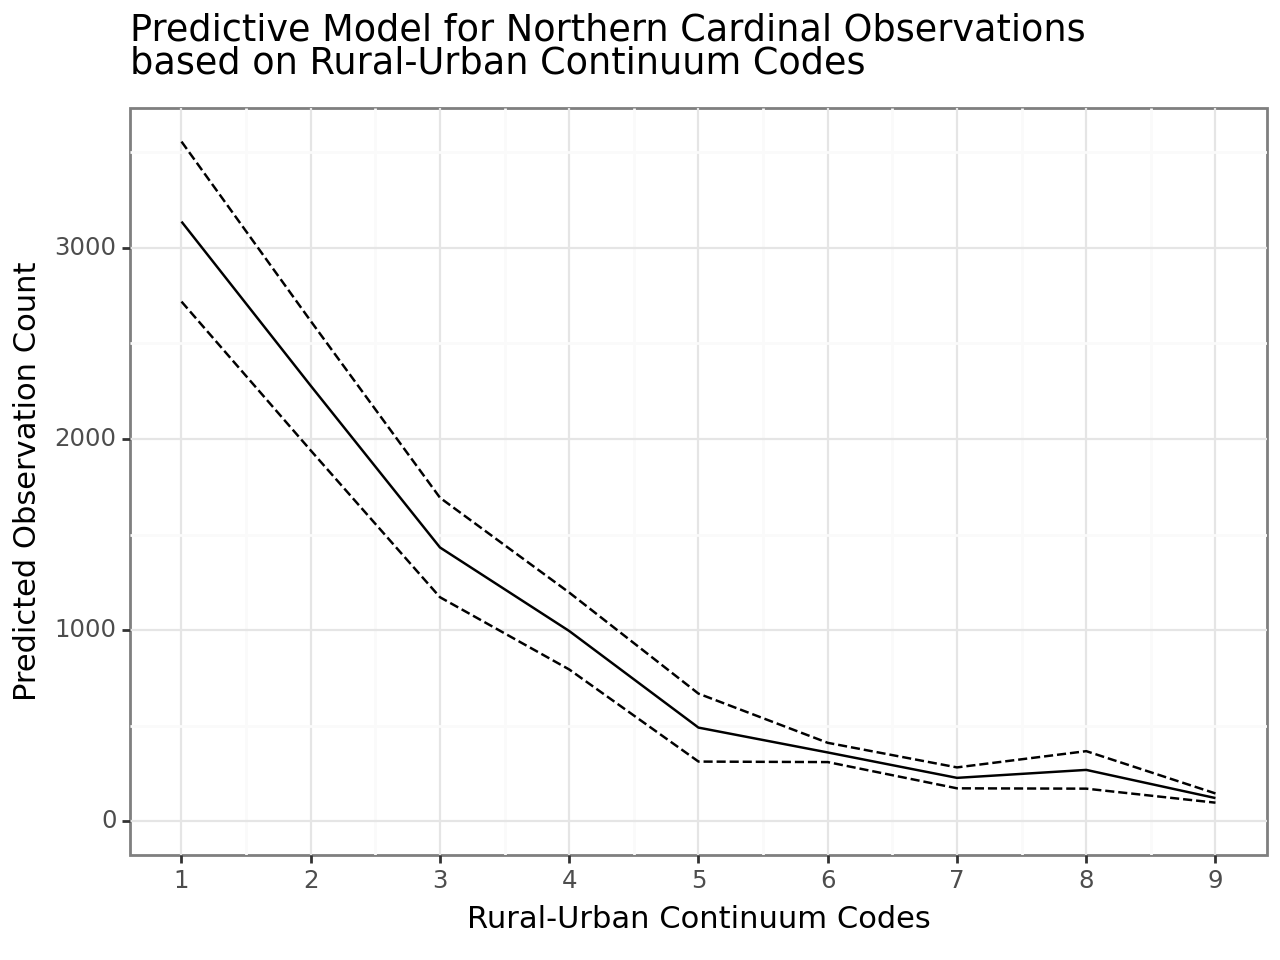

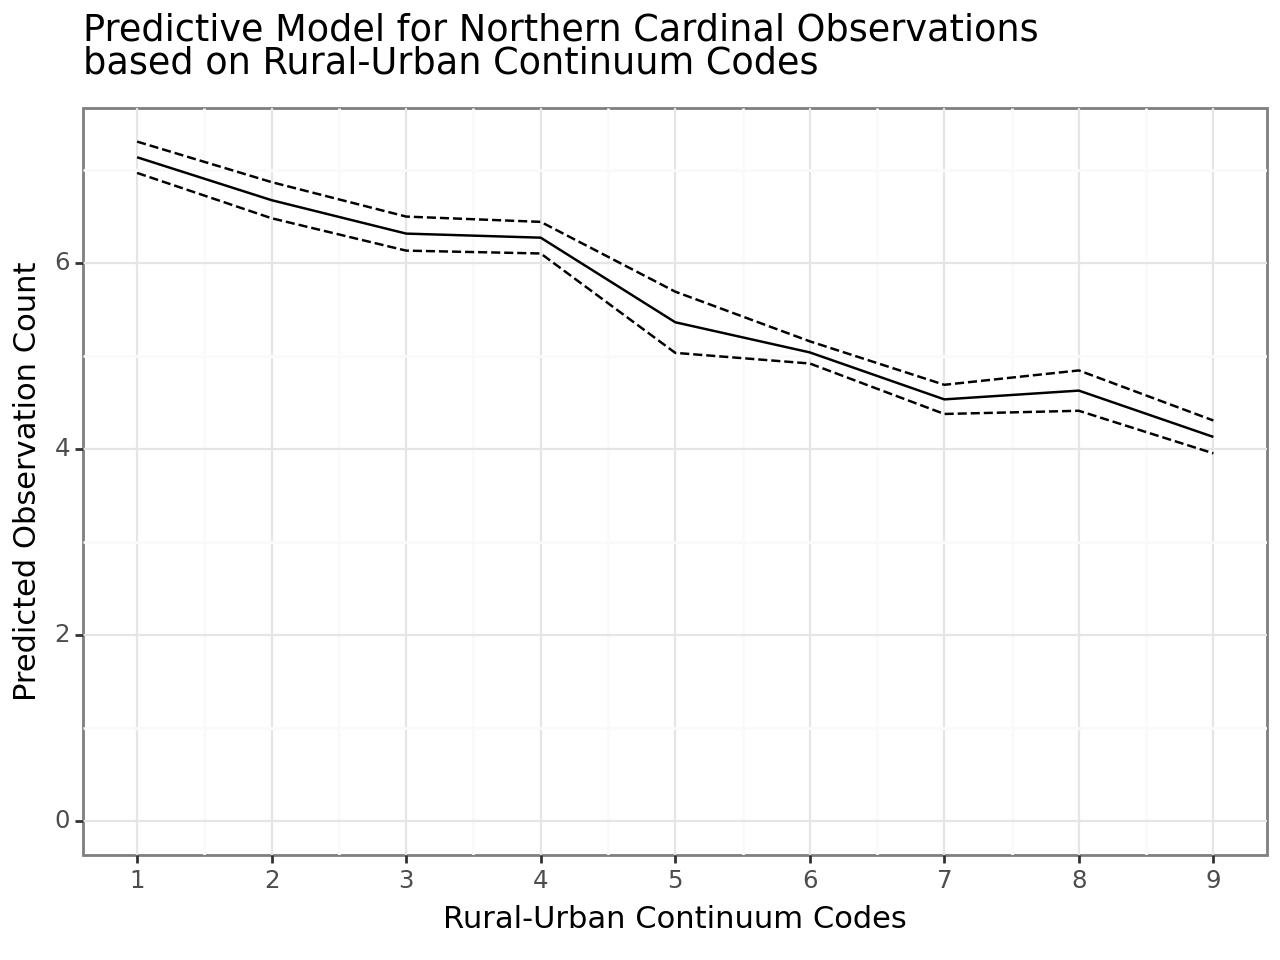

In [235]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_line, labs, theme_bw, scale_y_continuous

# Use the regression model to predict 'OBSERVATION_COUNT' based on the dataset
pred = reg19a.get_prediction(county_norcar_merged_dummies).summary_frame()
county_norcar_merged_dummies = county_norcar_merged_dummies.assign(
    fit=pred["mean"],
    fit_se=pred["mean_se"],
    CIup=pred["mean_ci_upper"],
    CIlo=pred["mean_ci_lower"]
)

# Plotting the predictions along with their confidence intervals
plot = (
    ggplot(county_norcar_merged_dummies, aes(x="Rural_Urban_Continuum_Code_2013", y="fit")) +  # Assuming 'UrbanInfluence_2' is the x-axis variable
    geom_line() +  # Plot the line for fit values
    geom_line(aes(y="CIup"), linetype="dashed") +  # Plot the upper CI
    geom_line(aes(y="CIlo"), linetype="dashed") +  # Plot the lower CI
    labs(title="Predictive Model for Northern Cardinal Observations\nbased on Rural-Urban Continuum Codes",
         x="Rural-Urban Continuum Codes", y="Predicted Observation Count") +
    theme_bw() +  # Apply a black-and-white theme
    scale_x_continuous(breaks=range(1,10)) + 
    scale_y_continuous(limits=(0, county_norcar_merged_dummies['CIup'].max()))  # Adjust y-axis to start at 0 and end at the max upper CI
)

print(plot)


# Use the regression model to predict 'OBSERVATION_COUNT' based on the dataset
pred = reg19b.get_prediction(county_norcar_merged_dummies).summary_frame()
county_norcar_merged_dummies = county_norcar_merged_dummies.assign(
    fit=pred["mean"],
    fit_se=pred["mean_se"],
    CIup=pred["mean_ci_upper"],
    CIlo=pred["mean_ci_lower"]
)

# Plotting the predictions along with their confidence intervals
plot = (
    ggplot(county_norcar_merged_dummies, aes(x="Rural_Urban_Continuum_Code_2013", y="fit")) +  # Assuming 'UrbanInfluence_2' is the x-axis variable
    geom_line() +  # Plot the line for fit values
    geom_line(aes(y="CIup"), linetype="dashed") +  # Plot the upper CI
    geom_line(aes(y="CIlo"), linetype="dashed") +  # Plot the lower CI
    labs(title="Predictive Model for Northern Cardinal Observations\nbased on Rural-Urban Continuum Codes",
         x="Rural-Urban Continuum Codes", y="Predicted Observation Count") +
    theme_bw() +  # Apply a black-and-white theme
    scale_x_continuous(breaks=range(1,10)) + 
    scale_y_continuous(limits=(0, county_norcar_merged_dummies['CIup'].max()))  # Adjust y-axis to start at 0 and end at the max upper CI
)

print(plot)

In [140]:
# OLS on Rural-Urban Continuum Codes
reg20 = smf.ols(formula="OBSERVATION_COUNT ~ EconType_FarmDependent", data=county_norcar_merged_dummies).fit(cov_type="HC1") # Unconditional
reg21 = smf.ols(formula="OBSERVATION_COUNT ~ EconType_FarmDependent + EconType_MiningDependent", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg22 = smf.ols(formula="OBSERVATION_COUNT ~ EconType_FarmDependent + EconType_MiningDependent + EconType_ManufacturingDependent", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg23 = smf.ols(formula="OBSERVATION_COUNT ~ EconType_FarmDependent + EconType_MiningDependent + EconType_ManufacturingDependent + EconType_FederalStateGovDependent", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg24 = smf.ols(formula="OBSERVATION_COUNT ~ EconType_FarmDependent + EconType_MiningDependent + EconType_ManufacturingDependent + EconType_FederalStateGovDependent + EconType_RecreationDependent", data=county_norcar_merged_dummies).fit(cov_type="HC1")

stargazer = Stargazer([reg20, reg21, reg22, reg23, reg24])
stargazer.covariate_order(["EconType_FarmDependent", "EconType_MiningDependent", "EconType_ManufacturingDependent", 
                           "EconType_FederalStateGovDependent", "EconType_RecreationDependent", "Intercept"])

stargazer.rename_covariates({
    "EconType_FarmDependent": "Economically Farming Dependent",
    "EconType_MiningDependent": "Economically Mining Dependent",
    "EconType_ManufacturingDependent": "Economically Manufacturing Dependent",
    "EconType_FederalStateGovDependent": "Economically Federal/State Government Dependent",
    "EconType_RecreationDependent": "Economically Recreation Dependent",
    "Intercept": "Constant"
})


#stargazer.custom_columns(["Unconditional", "Level of Education", "BA Degree Quadratic", "MA & Prof Degree", "4th Order Polynomial"], [1, 1, 1, 1, 1])
stargazer

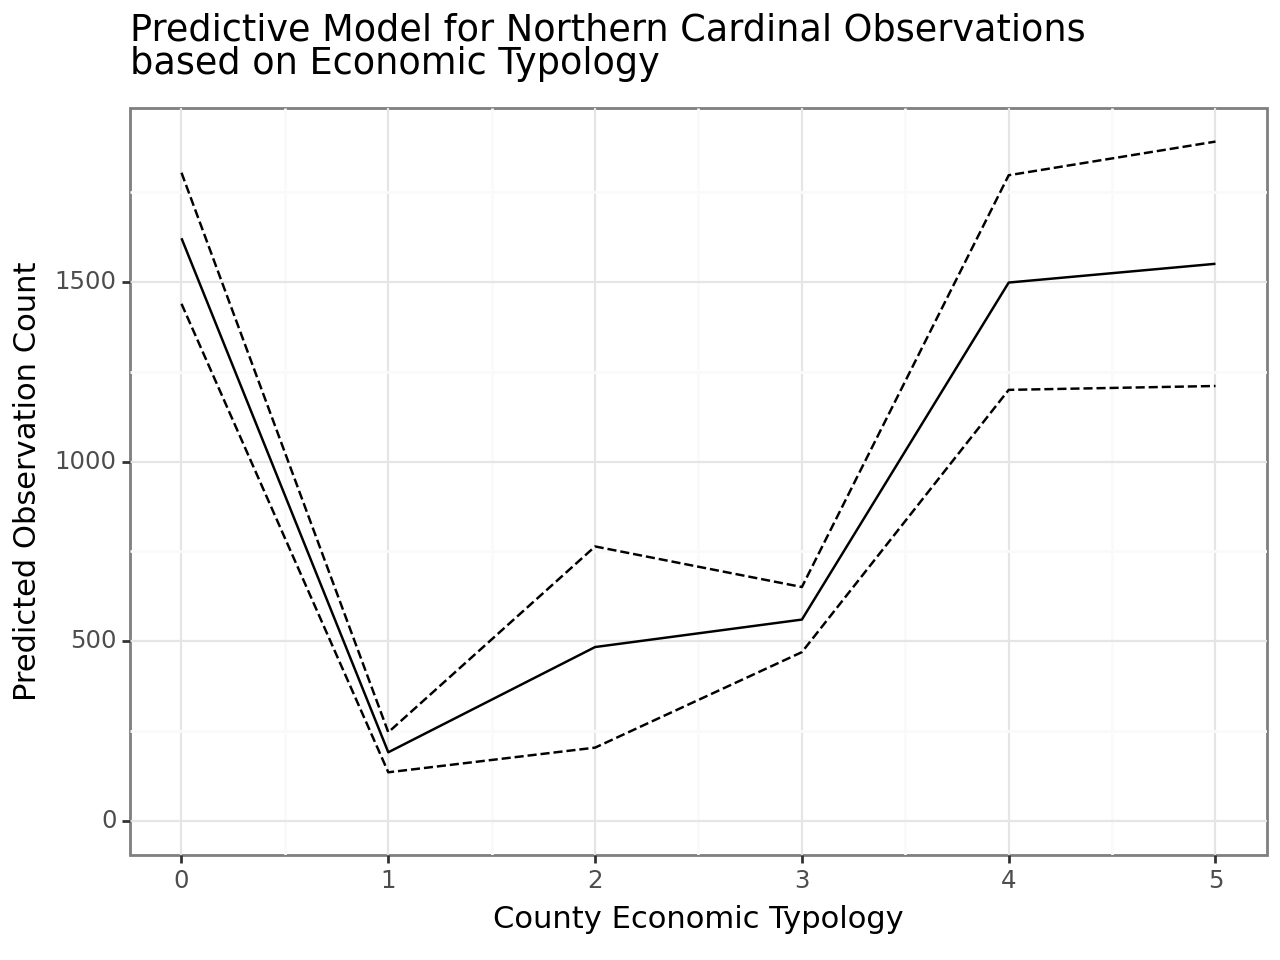

In [236]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_line, labs, theme_bw, scale_y_continuous

# Use the regression model to predict 'OBSERVATION_COUNT' based on the dataset
pred = reg24.get_prediction(county_norcar_merged_dummies).summary_frame()
county_norcar_merged_dummies = county_norcar_merged_dummies.assign(
    fit=pred["mean"],
    fit_se=pred["mean_se"],
    CIup=pred["mean_ci_upper"],
    CIlo=pred["mean_ci_lower"]
)

# Plotting the predictions along with their confidence intervals
plot = (
    ggplot(county_norcar_merged_dummies, aes(x="Economic_typology_2015", y="fit")) +  # Assuming 'UrbanInfluence_2' is the x-axis variable
    geom_line() +  # Plot the line for fit values
    geom_line(aes(y="CIup"), linetype="dashed") +  # Plot the upper CI
    geom_line(aes(y="CIlo"), linetype="dashed") +  # Plot the lower CI
    labs(title="Predictive Model for Northern Cardinal Observations\nbased on Economic Typology",
         x="County Economic Typology", y="Predicted Observation Count") +
    theme_bw() +  # Apply a black-and-white theme
    scale_x_continuous(breaks=range(0,6)) + 
    scale_y_continuous(limits=(0, county_norcar_merged_dummies['CIup'].max()))  # Adjust y-axis to start at 0 and end at the max upper CI
)

print(plot)

In [229]:
# OLS on Rural-Urban Continuum Codes
# reg25 = smf.ols(formula="OBSERVATION_COUNT ~ CENSUS_2020_POP", data=county_norcar_merged_dummies).fit(cov_type="HC1") # Unconditional
#reg26 = smf.ols(formula="OBSERVATION_COUNT ~ POP_ESTIMATE_2022", data=county_norcar_merged_dummies).fit(cov_type="HC1")
#reg27 = smf.ols(formula="OBSERVATION_COUNT ~ POP_ESTIMATE_2022 + NATURAL_CHG_2022", data=county_norcar_merged_dummies).fit(cov_type="HC1")
#reg28 = smf.ols(formula="OBSERVATION_COUNT ~ POP_ESTIMATE_2022 + NATURAL_CHG_2022 + NET_MIG_2022", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg29 = smf.ols(formula="OBSERVATION_COUNT ~ R_NATURAL_CHG_2022 + R_NET_MIG_2022", data=county_norcar_merged_dummies).fit(cov_type="HC1")
reg30 = smf.ols(formula="ln_OBSERVATION_COUNT ~ R_NATURAL_CHG_2022 + R_NET_MIG_2022", data=county_norcar_merged_dummies).fit(cov_type="HC1")


stargazer = Stargazer([reg29, reg30])
stargazer.covariate_order(["R_NATURAL_CHG_2022", "R_NET_MIG_2022", "Intercept"])

stargazer.rename_covariates({
    "R_NATURAL_CHG_2022": "Natural Change Rate 2022",
    "R_NET_MIG_2022" : "Net Migration Rate 2022",
    "Intercept": "Constant"
})

stargazer

C:\Users\iandr\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_jitter : Removed 189 rows containing missing values.
C:\Users\iandr\anaconda3\Lib\site-packages\plotnine\themes\themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


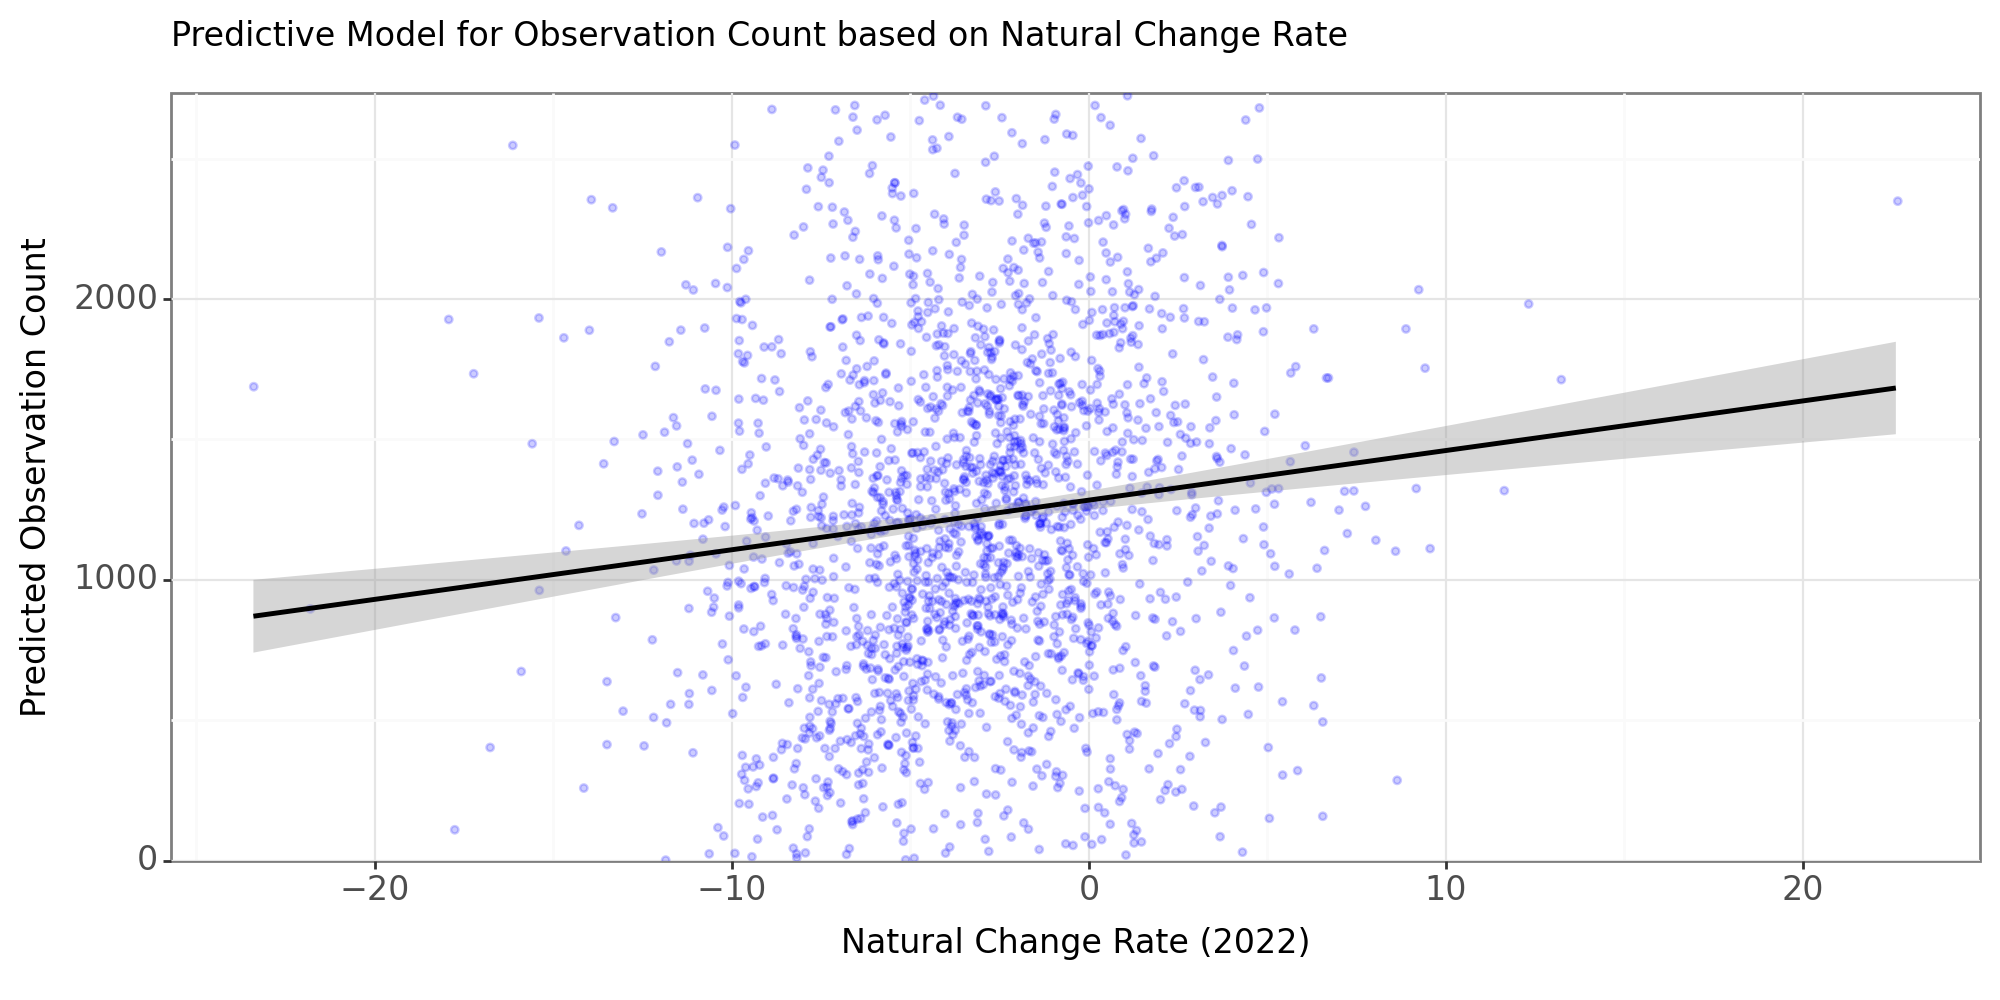

C:\Users\iandr\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_jitter : Removed 107 rows containing missing values.
C:\Users\iandr\anaconda3\Lib\site-packages\plotnine\themes\themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


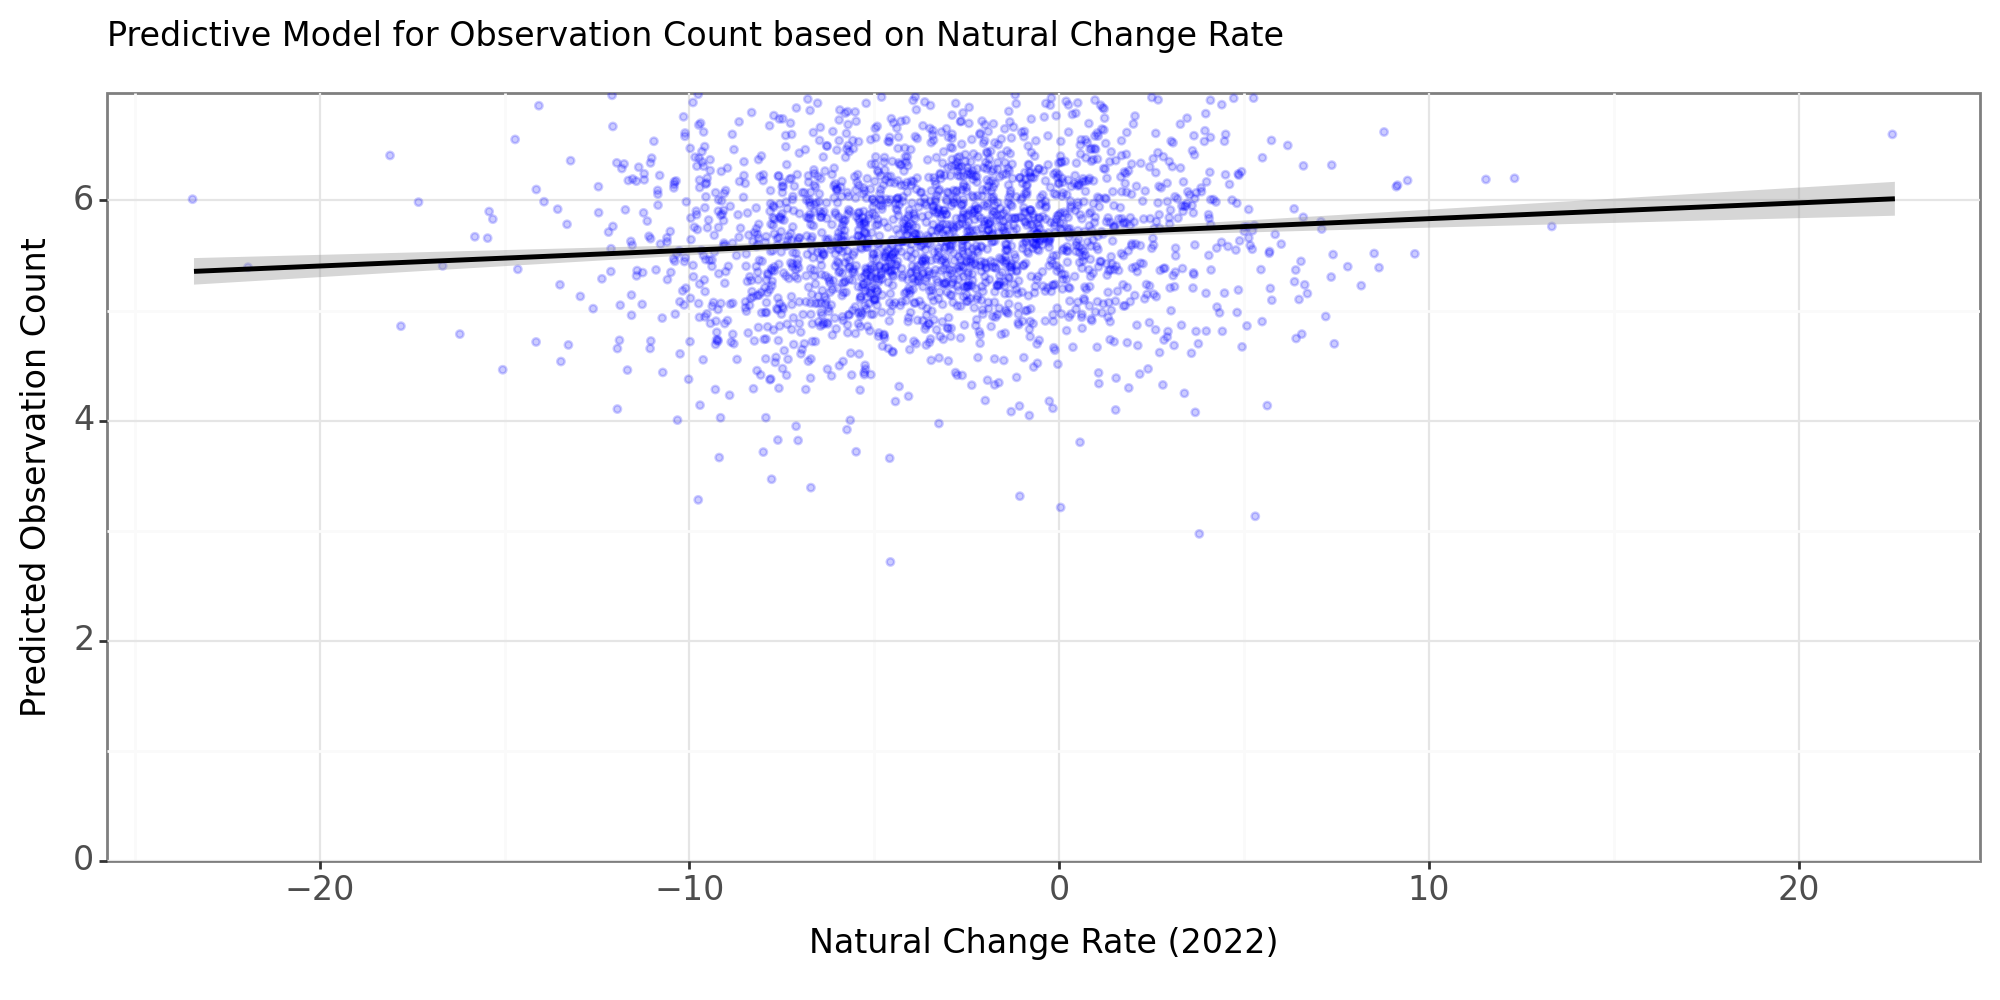

In [230]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_smooth, geom_jitter, labs, theme_bw, scale_y_continuous, scale_x_continuous, theme, element_text

# Use the regression model to predict 'OBSERVATION_COUNT' based on the dataset
pred = reg29.get_prediction(county_norcar_merged_dummies).summary_frame()
county_norcar_merged_dummies = county_norcar_merged_dummies.assign(
    fit=pred["mean"],
    fit_se=pred["mean_se"],
    CIup=pred["mean_ci_upper"],
    CIlo=pred["mean_ci_lower"]
)

# Plotting the predictions along with their confidence intervals
plot = (
    ggplot(county_norcar_merged_dummies, aes(x="R_NATURAL_CHG_2022", y="fit")) +
    geom_jitter(alpha=0.2, size=1, width=0.1, color='blue') +  # Add jitter to the points and reduce alpha to avoid overplotting
    geom_smooth(method='lm', color='black', se=True) +  # Use a linear model for a smoother line
    labs(title="Predictive Model for Observation Count based on Natural Change Rate",
         x="Natural Change Rate (2022)", y="Predicted Observation Count") +
    theme_bw() +  # Apply a black-and-white theme
    theme(figure_size=(10, 5),  # Make the figure wider for better readability
          text=element_text(size=12),  # Adjust text size
          subplots_adjust={'right': 0.85}) +  # Adjust the subplot to fit the figure
    scale_x_continuous() +  # Let Plotnine choose the best x-axis breaks
    scale_y_continuous(limits=(0, county_norcar_merged_dummies['CIup'].quantile(0.95)), expand=(0, 0))  # Adjust y-axis limits and remove expansion
)

print(plot)




# Use the regression model to predict 'OBSERVATION_COUNT' based on the dataset
pred = reg30.get_prediction(county_norcar_merged_dummies).summary_frame()
county_norcar_merged_dummies = county_norcar_merged_dummies.assign(
    fit=pred["mean"],
    fit_se=pred["mean_se"],
    CIup=pred["mean_ci_upper"],
    CIlo=pred["mean_ci_lower"]
)

# Plotting the predictions along with their confidence intervals
plot = (
    ggplot(county_norcar_merged_dummies, aes(x="R_NATURAL_CHG_2022", y="fit")) +
    geom_jitter(alpha=0.2, size=1, width=0.1, color='blue') +  # Add jitter to the points and reduce alpha to avoid overplotting
    geom_smooth(method='lm', color='black', se=True) +  # Use a linear model for a smoother line
    labs(title="Predictive Model for Observation Count based on Natural Change Rate",
         x="Natural Change Rate (2022)", y="Predicted Observation Count") +
    theme_bw() +  # Apply a black-and-white theme
    theme(figure_size=(10, 5),  # Make the figure wider for better readability
          text=element_text(size=12),  # Adjust text size
          subplots_adjust={'right': 0.85}) +  # Adjust the subplot to fit the figure
    scale_x_continuous() +  # Let Plotnine choose the best x-axis breaks
    scale_y_continuous(limits=(0, county_norcar_merged_dummies['CIup'].quantile(0.95)), expand=(0, 0))  # Adjust y-axis limits and remove expansion
)

print(plot)

C:\Users\iandr\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_jitter : Removed 189 rows containing missing values.
C:\Users\iandr\anaconda3\Lib\site-packages\plotnine\themes\themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


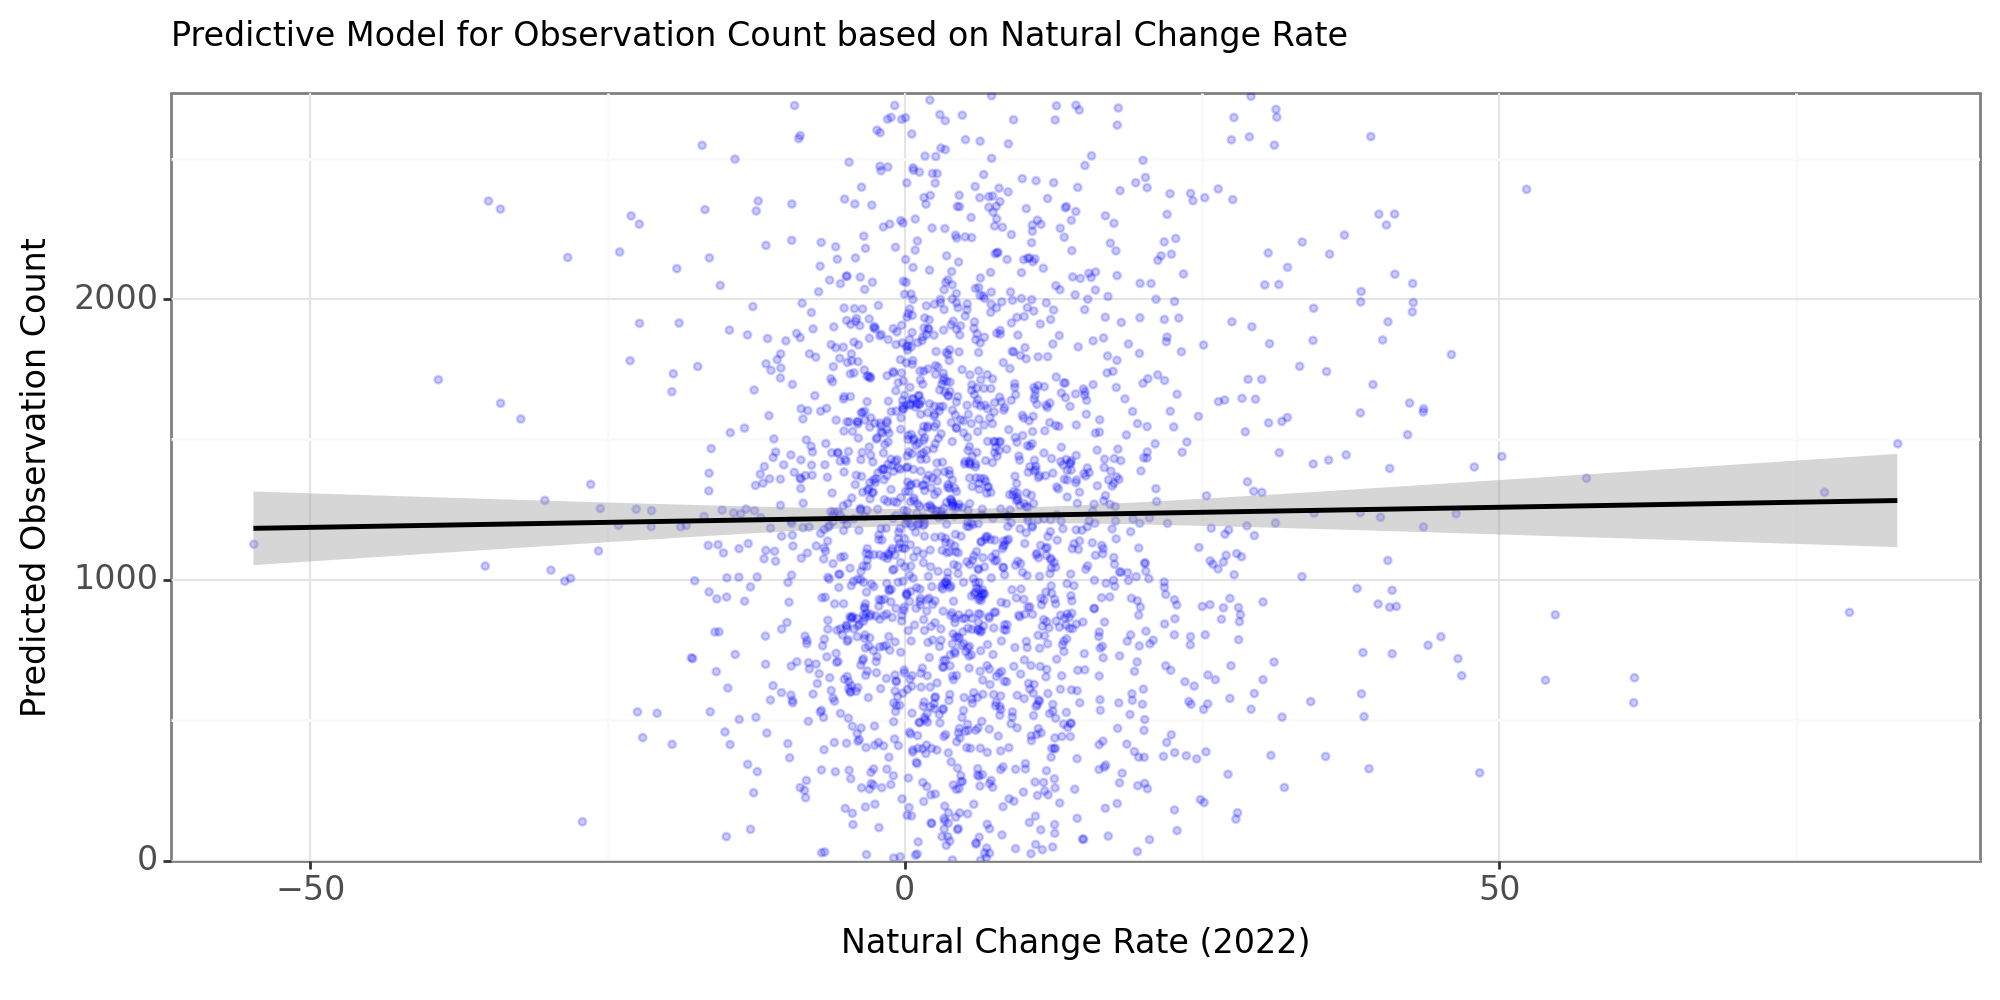

C:\Users\iandr\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_jitter : Removed 106 rows containing missing values.
C:\Users\iandr\anaconda3\Lib\site-packages\plotnine\themes\themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


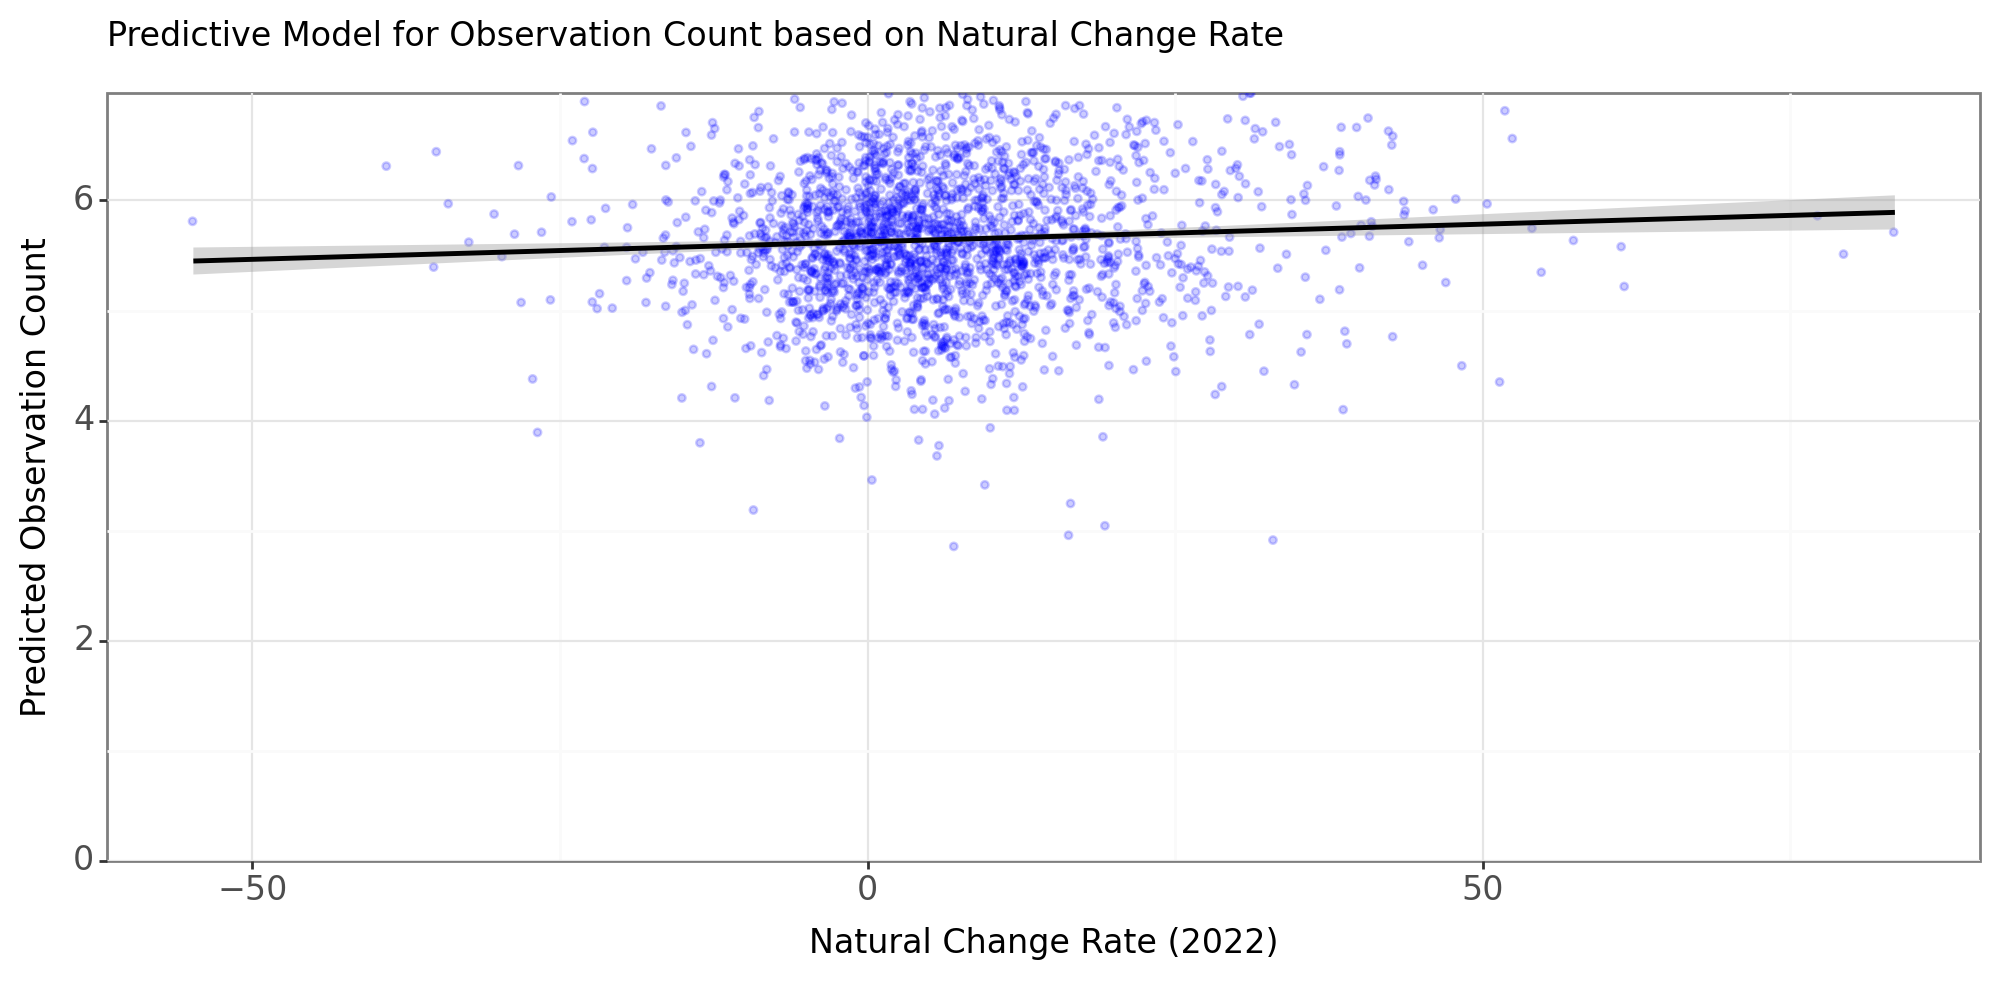

In [231]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_smooth, geom_jitter, labs, theme_bw, scale_y_continuous, scale_x_continuous, theme, element_text

# Use the regression model to predict 'OBSERVATION_COUNT' based on the dataset
pred = reg29.get_prediction(county_norcar_merged_dummies).summary_frame()
county_norcar_merged_dummies = county_norcar_merged_dummies.assign(
    fit=pred["mean"],
    fit_se=pred["mean_se"],
    CIup=pred["mean_ci_upper"],
    CIlo=pred["mean_ci_lower"]
)

# Plotting the predictions along with their confidence intervals
plot = (
    ggplot(county_norcar_merged_dummies, aes(x="R_NET_MIG_2022", y="fit")) +
    geom_jitter(alpha=0.2, size=1, width=0.1, color='blue') +  # Add jitter to the points and reduce alpha to avoid overplotting
    geom_smooth(method='lm', color='black', se=True) +  # Use a linear model for a smoother line
    labs(title="Predictive Model for Observation Count based on Natural Change Rate",
         x="Natural Change Rate (2022)", y="Predicted Observation Count") +
    theme_bw() +  # Apply a black-and-white theme
    theme(figure_size=(10, 5),  # Make the figure wider for better readability
          text=element_text(size=12),  # Adjust text size
          subplots_adjust={'right': 0.85}) +  # Adjust the subplot to fit the figure
    scale_x_continuous() +  # Let Plotnine choose the best x-axis breaks
    scale_y_continuous(limits=(0, county_norcar_merged_dummies['CIup'].quantile(0.95)), expand=(0, 0))  # Adjust y-axis limits and remove expansion
)

print(plot)



# Use the regression model to predict 'OBSERVATION_COUNT' based on the dataset
pred = reg30.get_prediction(county_norcar_merged_dummies).summary_frame()
county_norcar_merged_dummies = county_norcar_merged_dummies.assign(
    fit=pred["mean"],
    fit_se=pred["mean_se"],
    CIup=pred["mean_ci_upper"],
    CIlo=pred["mean_ci_lower"]
)

# Plotting the predictions along with their confidence intervals
plot = (
    ggplot(county_norcar_merged_dummies, aes(x="R_NET_MIG_2022", y="fit")) +
    geom_jitter(alpha=0.2, size=1, width=0.1, color='blue') +  # Add jitter to the points and reduce alpha to avoid overplotting
    geom_smooth(method='lm', color='black', se=True) +  # Use a linear model for a smoother line
    labs(title="Predictive Model for Observation Count based on Natural Change Rate",
         x="Natural Change Rate (2022)", y="Predicted Observation Count") +
    theme_bw() +  # Apply a black-and-white theme
    theme(figure_size=(10, 5),  # Make the figure wider for better readability
          text=element_text(size=12),  # Adjust text size
          subplots_adjust={'right': 0.85}) +  # Adjust the subplot to fit the figure
    scale_x_continuous() +  # Let Plotnine choose the best x-axis breaks
    scale_y_continuous(limits=(0, county_norcar_merged_dummies['CIup'].quantile(0.95)), expand=(0, 0))  # Adjust y-axis limits and remove expansion
)

print(plot)